In [1]:
import pandas as pd
import numpy as np
import re

Importing data in pandas

In [6]:
data = pd.read_excel('/content/drive/MyDrive/zebra classification /Zebras.Assumption.data_Bing_413 .xlsx',sheet_name='Assumptions.all')

data  

,file,q25,q50,q75,fpeak,duration,am.var,am.rate,am.extent,harmonicity
0,05011.squeal.trim.wav,1.024,22.542,144.346,509.753,0.234,203.701,25.684,7.931,10.16
1,05073.squeal.trim.wav,4.626,391.921,635.612,537.097,0.155,204.375,16.133,12.668,20.27
2,05074.squeal.trim.wav,9.773,558.276,806.924,769.535,0.087,243.896,5.745,42.452,17.58
3,18023.squeal.trim.wav,378.288,439.051,489.999,442.747,0.165,245.843,9.098,27.022,13.51
4,19002.squeal.trim.wav,414.270,485.271,627.478,449.798,0.138,225.379,18.142,12.423,13.93
...,...,...,...,...,...,...,...,...,...,...
408,83033.snort.trim.wav,2.413,33.731,162.388,689.083,0.303,413.913,34.701,11.928,6.15
409,83035.snort.trim.wav,12.324,106.265,286.088,181.432,0.169,386.167,29.581,13.054,8.15
410,83051.snort.trim.wav,1.511,47.826,302.461,197.067,0.549,393.041,25.510,15.407,4.52
411,83053.snort.trim.wav,4.978,70.706,211.919,94.333,0.669,477.292,29.899,15.963,7.78


Creating the labels from the 'file' column

In [7]:
labels = []
for i in data['file']:
  y = re.findall('whinnie|snort|softsnort|squeal', i)
  labels.append(y)


In [ ]:
#clever way of doing that above
# [re.findall('whinnie|snort|softsnort|squeal', i) for i in data['file']]

Adding the labels to the dataset

In [8]:
data[['labels']] = labels

Removing the file column

In [9]:
data.drop("file", axis=1, inplace = True)
data

,q25,q50,q75,fpeak,duration,am.var,am.rate,am.extent,harmonicity,labels
0,1.024,22.542,144.346,509.753,0.234,203.701,25.684,7.931,10.16,squeal
1,4.626,391.921,635.612,537.097,0.155,204.375,16.133,12.668,20.27,squeal
2,9.773,558.276,806.924,769.535,0.087,243.896,5.745,42.452,17.58,squeal
3,378.288,439.051,489.999,442.747,0.165,245.843,9.098,27.022,13.51,squeal
4,414.270,485.271,627.478,449.798,0.138,225.379,18.142,12.423,13.93,squeal
...,...,...,...,...,...,...,...,...,...,...
408,2.413,33.731,162.388,689.083,0.303,413.913,34.701,11.928,6.15,snort
409,12.324,106.265,286.088,181.432,0.169,386.167,29.581,13.054,8.15,snort
410,1.511,47.826,302.461,197.067,0.549,393.041,25.510,15.407,4.52,snort
411,4.978,70.706,211.919,94.333,0.669,477.292,29.899,15.963,7.78,snort



1) Splitting the data between features and labels

In [49]:
Y = data['labels']
X = data.drop('labels', axis = 1)

In [50]:
labels_names = Y.unique()

2) Splitting between training and test set

In [17]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

In [24]:
#keith, here we can just stratify but i dont know how cause there is no variable label in the x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, train_size = 0.8)


3) Defining the model and hyperparam

In [23]:
#min number of sample in each leaf
min_samples_split = [int(x) for x in range(15,25)]
#max number level of questions in each tree
max_depth = [int(x) for x in range(2,6)]

In [26]:
#hyperparam tuning
param_grid = {
    'min_samples_split': min_samples_split,
    'max_depth': max_depth
}
param_grid


{'max_depth': [2, 3, 4, 5],
 'min_samples_split': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24]}

I will now define the model so that we can apply that hyperparam grid

In [28]:
model1 = DecisionTreeClassifier()

In [30]:
#importing the grid that allows us to tune
from sklearn.model_selection import GridSearchCV

#applying the grid i created
rf_grid = GridSearchCV(model1, param_grid, cv = 3, verbose = 2)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [15, 16, 17, 18, 19, 20, 21, 22,
                                               23, 24]},
             verbose=2)

Now before fitting, Id like to define all the possibility of different hyperparameters

In [ ]:
rf_grid.fit(x_train,y_train)

#the grids best result was: {'max_depth': 3, 'min_samples_split': 19} which led to a 86,7 score

In [32]:
rf_grid.best_params_

{'max_depth': 3, 'min_samples_split': 19}

In [33]:
rf_grid.score(x_train, y_train)

0.9121212121212121

In [34]:
rf_grid.score(x_test, y_test)

0.8674698795180723

# **Fitting the tree 1 so I can draw it**

Defining the a tree model using the best known hp

In [38]:
model1_best = DecisionTreeClassifier(max_depth = 3,
                                     min_samples_split = 19)

In [39]:
model1_best.fit(x_test,y_test)

DecisionTreeClassifier(max_depth=3, min_samples_split=19)

Representing the tree visually

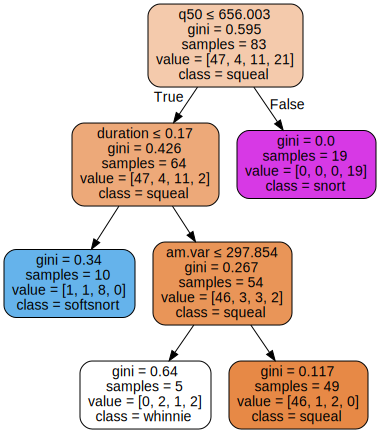

In [52]:
dot_data = export_graphviz(decision_tree = model1_best,   
                      out_file=None, 
                      feature_names=X.columns,       #Provide X Variables Column Names 
                      class_names=labels_names,      # Provide Target Variable Column Name
                      filled=True, rounded=True,     # Controls the look of the nodes and colours it
                      special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 

# Other tree with different specs

In [ ]:
#new hp grid
#min number of sample in each leaf
min_samples_split2 = [int(x) for x in range(12,30)]
#max number level of questions in each tree
max_depth2 = [int(x) for x in range(3,8)]


#hyperparam tuning
param_grid2 = {
    'min_samples_split': min_samples_split2,
    'max_depth': max_depth2
}
param_grid2


Creating a model 2 and a search grid 

In [55]:
model2 = DecisionTreeClassifier()

In [60]:
rf_grid2 = GridSearchCV(model2, param_grid2, cv = 5, verbose = 2)

Running GridSearchCV, a function that create all the possibilities and store those possibilities in rf_grid2.

To actually run these possibilities, I will run rf_grid.fit(training data)

Then I select the best possibility and run a decision tree with it.

In [ ]:
rf_grid2.fit(x_train,y_train)

#{'max_depth': 4, 'min_samples_split': 12} train = 0.87, test = 0.93

Now ill discover the best set of hyperparams. The object rf_grid2 has (the method fit used earlier and) the attribute best_params to check the best models.

In [62]:
rf_grid2.best_params_

{'max_depth': 4, 'min_samples_split': 12}

getting the train and test scores: score() is also a method of rf_grid2

In [63]:
rf_grid2.score(x_train,y_train)

0.9333333333333333

In [64]:
rf_grid2.score(x_test,y_test)

0.8795180722891566

plotting this second tree

In [66]:
model2_best = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_split = 12)

model2_best.fit(x_test,y_test)

DecisionTreeClassifier(max_depth=4, min_samples_split=12)

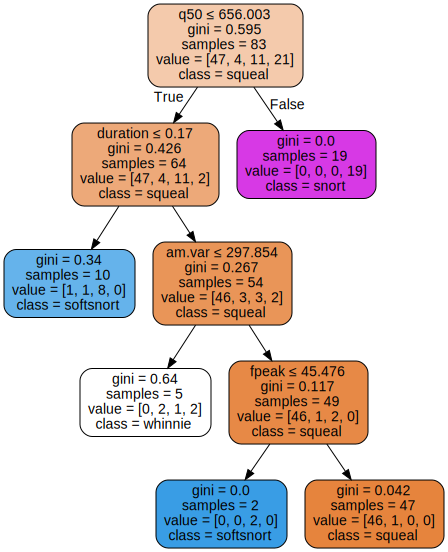

In [67]:
dot_data = export_graphviz(decision_tree = model2_best,   
                      out_file=None, 
                      feature_names=X.columns,       #Provide X Variables Column Names 
                      class_names=labels_names,      # Provide Target Variable Column Name
                      filled=True, rounded=True,     # Controls the look of the nodes and colours it
                      special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 